In [6]:
using QuantumOptics
using PyPlot

State Definitions:

$\left|1\right> = \left|F=3,M=0\right>$

$\left|2\right> = \left|F=4,M=0\right>$

$\left|3\right> = \left|F'=4,M=-1\right>$

$\left|4\right> = \left|F'=4,M=1\right>$

$\left|5\right> = \left|F'=3,M=-1\right>$

$\left|6\right> = \left|F'=3,M=1\right>$

Important parameters in an experiment:
1. Single photon detuning
2. two-photon detuning
3. power $\rightarrow$ Rabi frequency

In [442]:
Δ = 100000;
δ = -15;
Ω₁₃ = 750*0.93;
Ω₁₄ = 750*0.07;
Ω₁₅ = 1890*0.93;
Ω₁₆ = 1890*0.07;
Ω₂₃ = 1470*0.93;
Ω₂₄ = 1470*0.07;
Ω₂₅ = 210*0.93;
Ω₂₆ = 210*0.07;

1. if all fractions multiplying the $\Omega_i$ are equal the $\delta$ decreases. For instance if all are 0.5 then $\delta = -1.1$
2. if the fractions multiplying the $\Omega_i$ are 0.93 for even (odd) and 0.07 for odd (even) $\delta$ increases to -1.5
3. For $\Delta >> \Omega_i$ the system behaves like a two level system and very little population is transferred to all higher lying states.
4. if the fractions multiplying the $\Omega_i$ are swapped from the even to odd transitions or vice versa, the population into the ground states remains the same. This is due to the symmetry of the coupling to the excited state manifold.

In [443]:
# Basis and operators
b = NLevelBasis(6)
σ₁₃ = transition(b, 1, 3)
σ₁₄ = transition(b, 1, 4)
σ₁₅ = transition(b, 1, 5)
σ₁₆ = transition(b, 1, 6)
σ₂₃ = transition(b, 2, 3)
σ₂₄ = transition(b, 2, 4)
σ₂₅ = transition(b, 2, 5)
σ₂₆ = transition(b, 2, 6)
proj₁ = transition(b, 1, 1)
proj₂ = transition(b, 2, 2)
proj₃ = transition(b, 3, 3)
proj₄ = transition(b, 4, 4)
proj₅ = transition(b, 5, 5)
proj₆ = transition(b, 6, 6)

Operator(dim=6x6)
  basis: NLevel(N=6)
  [6, 6]  =  1.0+0.0im

In [444]:
H0 = -Δ*(proj₃+proj₄+proj₅+proj₆)-δ*(proj₂)
H1 = (Ω₁₃*(σ₁₃+dagger(σ₁₃))+Ω₁₄*(σ₁₄+dagger(σ₁₄))+Ω₁₅*(σ₁₅+dagger(σ₁₅))+Ω₁₆*(σ₁₆+dagger(σ₁₆)))
H2 = (Ω₂₃*(σ₂₃+dagger(σ₂₃))+Ω₂₄*(σ₂₄+dagger(σ₂₄))+Ω₂₅*(σ₂₅+dagger(σ₂₅))+Ω₂₆*(σ₂₆+dagger(σ₂₆)))
H = H0 + H1 + H2;

In [445]:
# Integration time
T = [0:0.0001:0.5;]
Ψ01 = nlevelstate(b,1)
Ψ02 = nlevelstate(b,2)
# Schroedinger time evolution
tout, Ψt1 = timeevolution.schroedinger(T, Ψ01, H);
tout, Ψt2 = timeevolution.schroedinger(T, Ψ02, H);

In [446]:
P1_1 = real(expect(proj₁,Ψt1))
P2_1 = real(expect(proj₂,Ψt1))
P3_1 = real(expect(proj₃,Ψt1))
P4_1 = real(expect(proj₄,Ψt1))
P5_1 = real(expect(proj₅,Ψt1))
P6_1 = real(expect(proj₆,Ψt1));

In [447]:
P1_2 = real(expect(proj₁,Ψt2));

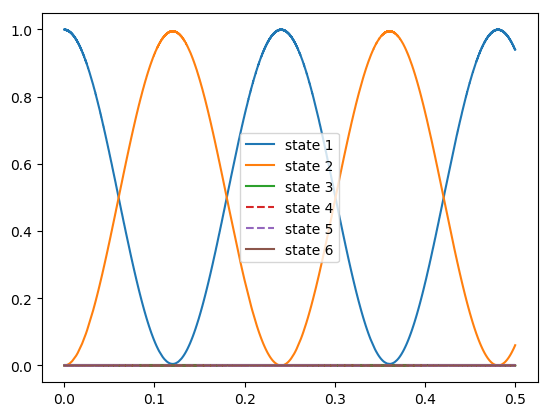

PyObject <matplotlib.legend.Legend object at 0x0000000063EA7780>

In [448]:
plot(T, P1_1,label = "state 1")
plot(T, P2_1,label = "state 2")
plot(T, P3_1,label = "state 3")
plot(T, P4_1,"--",label = "state 4")
plot(T, P5_1,"--",label = "state 5")
plot(T, P6_1,label = "state 6")
hlines(minimum(P1),T[1],T[end])
legend()

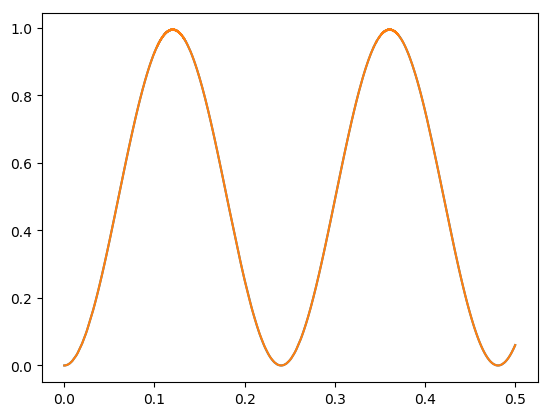

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063F1E5F8>

In [449]:
# check to see if starting in |1> or |2> changes rate? No. Probability is conserved!
plot(tout,P2_1)
plot(tout,P1_2)

In [451]:
pwd()

"C:\\Users\\Adrian\\github\\JuliaScripts"

In [471]:
include("MyFunctions.jl")

Main.MyFunctions

In [473]:
MyFunctions.RabiFlopping(T, Ψ01, H)

([0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009  …  0.4991, 0.4992, 0.4993, 0.4994, 0.4995, 0.4996, 0.4997, 0.4998, 0.4999, 0.5], Ket{NLevelBasis{Int64},Array{Complex{Float64},1}}[Ket(dim=6)
  basis: NLevel(N=6)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im, Ket(dim=6)
  basis: NLevel(N=6)
   0.9993329174736105 - 0.00378997197786382im
 -0.00024359042822075 - 0.00137396182543697im
  0.01278821409930184 + 0.00378293900430614im
  0.00096255374940982 + 0.00028473734441014im
  0.03226512134957235 + 0.00954447465888964im
  0.00242855752093555 + 0.00071840131841105im, Ket(dim=6)
  basis: NLevel(N=6)
  0.9997554839130707 - 0.00685751957848838im
  -9.664111713287e-5 - 0.00248559751326668im
 0.00420156936980731 - 0.00648022434940436im
 0.00031624715686722 - 0.00048775882199818im
 0.01051612011779453 - 0.01621918901844836im
 0.00079153592284475 - 0.0012207991734316im, Ket(dim=6)
  basis: NLevel(N=6)
   0.9996347779737207 - 0.0111339469